**Customer Churn Prediction using ANN**

 Customer churn prediction is the practice of analyzing data to detect customers who are likely to cancel their subscriptions. This dataset is for a bank.

In [49]:
import pandas as pd

In [50]:
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [51]:
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [52]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [54]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [56]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [57]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [59]:
X = data.drop(columns=['Exited'])
y = data['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

Scaling the model so that weights have a proper value and not varied ones

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 442.2356 - accuracy: 0.6441 - val_loss: 103.7944 - val_accuracy: 0.6475
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 73.4538 - accuracy: 0.6419 - val_loss: 77.2522 - val_accuracy: 0.6938
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 53.4812 - accuracy: 0.6655 - val_loss: 89.5908 - val_accuracy: 0.5144
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 46.1500 - accuracy: 0.6655 - val_loss: 59.5702 - val_accuracy: 0.7906
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 44.9788 - accuracy: 0.6727 - val_loss: 69.0998 - val_accuracy: 0.7900
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 33.8903 - accuracy: 0.6806 - val_loss: 20.7912 - val_accuracy: 0.6650
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 40.3181 - accuracy: 0.6667 - val_loss: 48.6022 - val_

In [80]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [81]:
y_pred

array([[2.2327973e-11],
       [8.3344748e-06],
       [4.9578389e-25],
       ...,
       [3.5606089e-38],
       [1.3465491e-10],
       [9.1633810e-12]], dtype=float32)

In [82]:
y_pred = y_pred.argmax(axis=-1)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

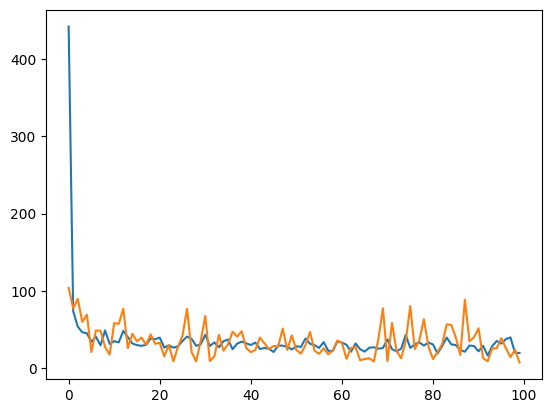

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

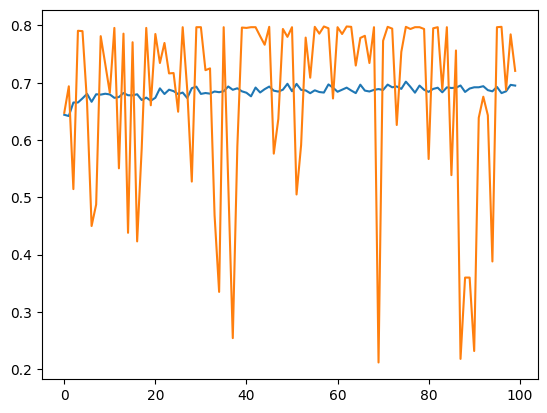

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])